In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
q_stars = []

k = 10

for i in range(k):
    q_stars.append(round(np.random.normal(loc=0.0, scale=1.0), 3))

q_stars

[0.12, -0.404, 0.238, 0.097, -0.69, 0.052, 0.801, -0.075, -0.212, -0.805]

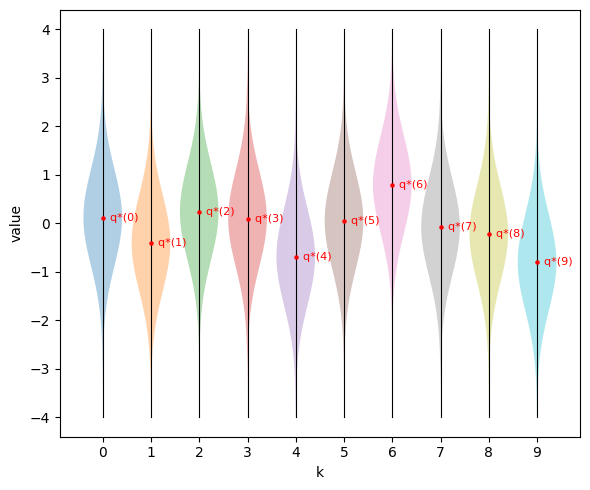

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

y = np.linspace(-4, 4, 400)
plt.figure(figsize=(6, 5))

sigma = 1
for i, mu in enumerate(q_stars):
    pdf = norm.pdf(y, mu, sigma)
    width = pdf / pdf.max() * 0.4  # scale the width for visibility

    plt.fill_betweenx(y, i - width, i + width, alpha=0.35)
    plt.plot(np.full_like(y, i), y, color="k", lw=0.8)  # center line

    # mean marker + label
    plt.scatter(i, mu, color="red", s=5, zorder=3)
    plt.text(i, mu, f"  q*({i})", va="center", ha="left", color="red", fontsize=8)

plt.xticks(range(len(q_stars)), [f"{i}" for i in range(len(q_stars))])
plt.ylabel("value")
plt.xlabel("k")
plt.tight_layout()
plt.show()

In [5]:
def bandit(step_size=1000, epsilon=0.01):
    step = 0
    q = 0
    q_step = []
    while step < step_size:
        if np.random.uniform(0, 1) > epsilon:
            r = np.random.normal(q_stars[np.argmax(q_stars)], 1)
        else:
            r = np.random.normal(np.random.choice(q_stars), 1)
        step += 1
        q = q + 1 / step * (r - q)
        q_step.append(q)
    return q_step

In [ ]:
q_step_00 = []
q_step_01 = []
q_step_1 = []
q_step_5 = []
for i in range(2000):
    q_step_00.append(bandit(epsilon=0.0))
    q_step_01.append(bandit())
    q_step_1.append(bandit(epsilon=0.1))
    q_step_5.append(bandit(epsilon=0.5))

avg_q_step_00 = np.mean(q_step_00, axis=0)
avg_q_step_01 = np.mean(q_step_01, axis=0)
avg_q_step_1 = np.mean(q_step_1, axis=0)
avg_q_step_5 = np.mean(q_step_5, axis=0)

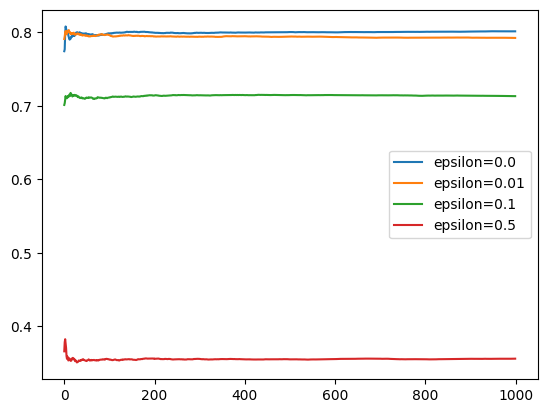

In [11]:
avg_q_step_00 = np.mean(q_step_00, axis=0)
plt.plot(avg_q_step_00, label="epsilon=0.0")
plt.plot(avg_q_step_01, label="epsilon=0.01")
plt.plot(avg_q_step_1, label="epsilon=0.1")
plt.plot(avg_q_step_5, label="epsilon=0.5")
plt.legend()
plt.show()